In [37]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar


# Optical Systems
## Non-imaging

![F1](illumination.jpg)

![F2](illumination2.jpg)

We will not be covering non-imaging systems in this class.


## Imaging Systems

All points from a point in are imaged to a different point.

![F3](imaging.jpg)

If all rays from a single point do not cross at a different point then the system does not produce a clear image.  For all rays to start from one point and cross at a second point the relationship needs to be linear. Most optical components are spherical (because they are easier to fabricate). Snell's law is 

$n_1 sin \theta_1 = n_2 sin \theta_2$

This relationship is not linear unless the angle is small.  The small angle approximation is called the paraxial approximation.

$sin \theta \approx \theta$

For an optical system to be good quality (clean images) the actual system needs to be made to behave like a system that meets the paraxial approximation.

C:\Users\logan\AppData\Local\Temp\ipykernel_26028\1405832509.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(theta, (theta-np.sin(theta))/theta*100,label='Error',color='green')


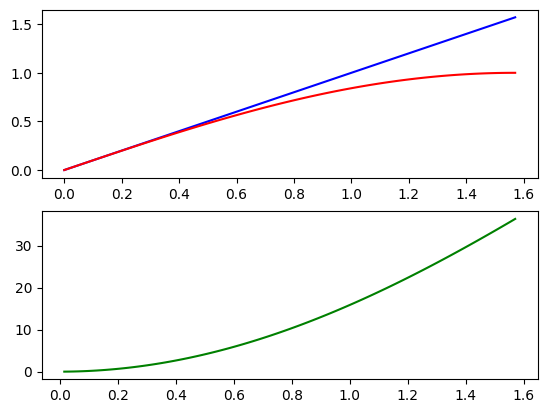

In [38]:
#Paraxial Approximation
theta=np.linspace(0,np.pi/2,100)
y1=np.sin(theta)

plt.subplot(2,1,1)
plt.plot(theta,theta,label='sin(theta)',color='blue')
plt.plot(theta, np.sin(theta),color='red') 
plt.subplot(2,1,2)
plt.plot(theta, (theta-np.sin(theta))/theta*100,label='Error',color='green')
plt.show()


<div style="border:4px solid red">

**HW1:** What is the range of angle for which the paraxial approximation is within 1% error?  Use an optimization not an array. (Variable name hw3_1.)

We want to practice using some type of optimization.  We only have a single variable so let's use root_scalar in the **SciPy** library. Find the value of x such that 

$\frac{sin(x)-x}{x}=0.01$

Use a range and an initial guess.  The range should be the first quadrant.

In [39]:
# Define the equation:
# (theta - sin(theta)) / theta = 0.01

def f(theta):
    return np.abs(theta - np.sin(theta)) / theta - 0.01

# Initial guess
x0 = np.pi / 4

# Solve on the range [0, pi/2]
sol = root_scalar(f, bracket=[1e-6, np.pi/2], x0=x0, method='brentq')
hw3_1=sol.root

print("Solution:")
print("theta =", hw3_1)
print("theta (radians) =", hw3_1)
print("sin(theta) =", np.sin(hw3_1))

print("theta (degrees) =", np.degrees(hw3_1))


Solution:
theta = 0.24531780885402182
theta (radians) = 0.24531780885402182
sin(theta) = 0.24286463076548168
theta (degrees) = 14.055675086732508


**Back to optical imaging derivation**

![F4](single.jpg)


We analyze refraction at a single spherical interface of radius R, separating two media with refractive indices $n_1$ (object side) and $n_2$ (image side).

In this picture (going from high index to low index) the object is point **O** and the image point is **I**.  In this case the image is a virtual image.  Virtual means that if I use a screen I cannot see the image.  If I put the screen at point **I** then I would block the incoming light so it would not produce an image.

**C** is the center of curvature of the refracting surface.  o.a. is the optical axis.

Start with the object ray.  

$\phi +\theta_1 + (180-\alpha_1)=180$

$\theta_1=\alpha_1-\phi$

Similarly, for the image ray

$\theta_2=\alpha_2-\phi$

$\theta_1$ and $\theta_2$ are related by Snell's law $\left( n_1 \theta_1 = n_2 \theta_2 \right)$

$n_1 \left( \alpha_1-\phi \right) = n_2 \left( \alpha_2-\phi \right)$

We want to relate the angles to the object and image positions (S and S').  We are assume the paraxial approximation.  This also assumes the thin lens approximation that there is negligible distance between **Q** and **V**.  An object at distance S from vertex V emits paraxial rays that refract at point A and intersect the optical axis at image point I, located at distance S′.

$tan \alpha_1 = \alpha_1 =\frac{h}{S}$

$tan \alpha_2 = \alpha_2 =\frac{h}{S}$

$tan \phi = \phi =\frac{h}{R}$


$n_1 \left( \frac{h}{S}-\frac{h}{R} \right) = n_2 \left( \frac{h}{S}-\frac{h}{R}\right)$

cancel $h$

$n_1 \left( \frac{1}{S}-\frac{1}{R} \right) = n_2 \left( \frac{1}{S'}-\frac{1}{R}\right)$

rearrange to get

$\frac{n_1}{S} + \frac{n_2}{S'} =\frac{n_2-n_1}{R}$

We often use $\frac{1}{f} =\frac{n_2-n_1}{R}$ resulting in 

$\frac{1}{f}= \frac{n_1}{S} + \frac{n_2}{S'}$


## Thin Lens

A **thin lens** is formed by two spherical refracting surfaces of radii $R_1$ and $R_2$, with thickness $d$ that is much smaller than the radii:
  
$d \ll R_1, R_2$

![F1](thin_lens.jpg)

First refracting surface:
$\frac{n_1}{s} + \frac{n_2}{s''} = \frac{n_2 - n_1}{R_1}$

The image of the first surface becomes the object of the second surface.  But it is referenced to point $V_2$.  This means that $s_{o2}=d-s''$ 

Second refracting surface:
$\frac{n_2}{(d-s'')} + \frac{n_3}{s'} = \frac{n_3 - n_2}{R_2}$

Let $d \rightarrow 0$ and $n_3=n_1$.

$\frac{n_2}{-s''} + \frac{n_1}{s'} = -\frac{n_2 - n_1}{R_2}$

From the first surface we get 

$-\frac{n_2}{s''} =\frac{n_1}{s} -\frac{n_2 - n_1}{R_1}$

Combine the two surfaces to get

$\frac{n_1}{s} -\frac{n_2 - n_1}{R_1} + \frac{n_1}{s'} = -\frac{n_2 - n_1}{R_2}$

$\frac{n_1}{s}  + \frac{n_1}{s'} =  \frac{n_2 - n_1}{R_1}-\frac{n_2 - n_1}{R_2}$

The conjugate equation is the relationship that links object location and image location produced by an optical lens and is

$\frac{n_1}{s}  + \frac{n_1}{s'}=\frac{1}{f}$

Typically, the lenses are in air resulting in 

$\boxed{\frac{1}{s}  + \frac{1}{s'}=\frac{1}{f}}$


The thin lens equation or the lens maker’s formula:
$\boxed{\frac{1}{f} = \frac{n_2 - n_1}{n_1}\left(\frac{1}{R_1} - \frac{1}{R_2}\right)}$

## Thin Lens Sign Conventions (Light from Left-to-Right)

- Surface radii:
  - \( R_i > 0 \): convex
  - \( R_i < 0 \): concave

- Object distance:
  - \( s > 0 \): real object (left of \(V\))
  - \( s < 0 \): virtual object (right of \(V\))

- Image distance:
  - \( s' > 0 \): real image (right of \(V\))
  - \( s' < 0 \): virtual image (left of \(V\))

- Focal length:
  - \( f > 0 \): converging / positive lens
  - \( f < 0 \): diverging / negative lens

## Changing Object Position: (Positive lens: $f>0$)

Far object distance: $S_o=\infty$ (incident beam collimated)
![F1](conjugate4.jpg)

Decreasing object distance: $S_o>f$ 
![F1](conjugate3.jpg)

Object distance equals focal length: $S_o=f$ (image beam is collimated)
![F1](conjugate2.jpg)

Close object: $S_o<f<0$ (highly divergent beam)

Virtual image location.  Image location to left of lens.  Image beam is diverging. 

![F1](conjugate1.jpg)


Object moves past lens: $S_o<0$ (converging beam)
![F1](conjugate5.jpg)

## Changing Object Position: (Negative lens: $f<>0$)

Far object distance: $S_o=\infty$ (incident beam collimated)

Virtual image.  Image location to left at focal length.  Image beam is diverging.

![F1](conjugate8.jpg)

Decreasing object distance: $S_o>|f|$ 

Virtual image.  Image location to left of focal length.  Image beam is diverging more than object beam.

![F1](conjugate7.jpg)


Close object: $S_o<|f|<0$ (highly divergent beam)

Virtual image.  Image location to left of focal length.  Image beam is diverging even more.

![F1](conjugate6.jpg)

Object moves past lens: $S_o<f$ (converging beam)

If beam is converging towards the focal length (on the image side).  image is collimated

![F1](conjugate9.jpg)

Object moves past lens: $S_o<f$ (converging beam)

![F1](conjugate10.jpg)

<div style="border:4px solid red">

**HW2:** A compact disc (CD) was first introduced as a commercial product in 1982.  The CD player works by focusing a laser onto the CD player. ( [CD/DVD Optical Pickup Information – RepairFAQ](https://www.repairfaq.org/sam/opickup.htm) ) In a particular CD player, the laser has a wavelength of 780nm (infrared) and the optical system has two lenses (collimator and objective).  The first lens is the collimating lens.  We will model the laser a point source with a divergence angle of $\Delta \theta = \pm 5^o$.  The collimating lens is placed $3mm$ away from the laser.  What is the focal length of the collimating lens?  (Name the variable as hw3_2.) 

In [40]:
#HW 3 Problem 2

# For a lens to perfectly collimate light from a point source, the point source simply needs to be at the focal point.

hw3_2 = 3e-3

<div style="border:4px solid red">

**HW3:** Continuing with the CD problem.  The distance from the objective length to surface of the CD is $3.8mm$.  What is the focal length of the objective lens?  (Name the variable as hw3_3.) 

In [41]:
#HW 3 Problem 3

# Same as before. a lens with a collimated input will focus directly to the focal point.

hw3_3 = 3.8e-3

<div style="border:4px solid red">

**HW4:** A lidar system has a laser with a wavelength of $\lambda=1550nm$.  A lens is placed at a distance of 10mm away from the laser. The lidar system is designed to focus the laser beam to a distance of 300m.  What is the focal length of the lens.  (Name the variable as hw3_4.) 

In [42]:
#HW 3 Problem 4

# Object distance (laser to lens)
s = 10e-3  # 10mm in meters

# Image distance (lens to target)
s_prime = 300  # 300m

# Using thin lens equation: 1/f = 1/s + 1/s'
hw3_4 = 1 / (1/s + 1/s_prime)

## Producing an image
Now let's look at producing an image from an object using a single thin lens.

We will analyze the lens and image using the following properties:

1. A ray passing through the focal point is bent parallel to the axis of symmetry. (Focal ray)

2. An incident ray parallel to the lens axis is bent to pass through the back focal point. (parallel ray)

3. A ray passing through the center of the lens is unchanged in direction. (chief ray)

4. A point in the object space is imaged to a point in the image space.

5. Parallel rays converge to a point
    *(A lens converts from incident angle to a point)*
     

**Examples**

$S_o>f$ and $f>0$

Real image, inverted image

![F1](trace1.jpg)

$S_o<f$ and $f>0$

Virtual image, not inverted image

![F1](trace2.jpg)

$f<0$

![F1](trace3.jpg)


<div style="border:4px solid red">

**HW5:** A 10 mm tall object is placed 150 mm to the left of a positive thin lens with a focal length of 100 mm. Another negative thin lens with a focal length of −75 mm is positioned 250 mm to the right of the positive lens. What is the  the location of the image, measuring its distance from the object?  (Name the variable as hw3_5.)

In [ ]:
#HW 3 Problem 5

# Given values
object_height = 10  # mm
s_obj = 150  # object distance from first lens (mm)
f_lens1 = 100  # focal length of first lens (mm)
f_lens2 = -75  # focal length of second lens (mm)
lens_separation = 250  # distance between lenses (mm)

# First lens: find image position s1'
# 1/f1 = 1/s1 + 1/s1'
# 1/s1' = 1/f1 - 1/s1
s1_prime = 1 / (1/f_lens1 - 1/s_obj)

# Second lens: the image from lens 1 becomes the object for lens 2
# Object distance for lens 2 (measured from lens 2)
s2 = lens_separation - s1_prime

# Find image position from second lens
# 1/f2 = 1/s2 + 1/s2'
s2_prime = 1 / (1/f_lens2 - 1/s2)

# Total distance from object to final image
# Distance = object to lens1 + lens1 to lens2 + lens2 to final image
hw3_5 = s_obj + lens_separation + s2_prime

print(f"Image from lens 1: {s1_prime} mm from lens 1")
print(f"Object distance for lens 2: {s2} mm")
print(f"Image from lens 2: {s2_prime} mm from lens 2")
print(f"Total distance from object to final image: {hw3_5} mm")

Final image location from object: 550.0 mm


<div style="border:4px solid red">

**HW6:** A 10 mm tall object is placed 150 mm to the left of a positive thin lens with a focal length of 100 mm. Another negative thin lens with a focal length of −75 mm is positioned 250 mm to the right of the positive lens. What is the height of the image? (Name the variable as hw3_6.)

In [43]:
#HW 3 Problem 6
# Magnification is the product of magnifications from each lens
# m1 = -s1'/s1 (for first lens)
# m2 = -s2'/s2 (for second lens)
# Total magnification: m_total = m1 * m2
object_height = 10

m1 = -s1_prime / s1
m2 = -s2_prime / s2

m_total = m1 * m2

# Image height = object height * magnification
hw3_6 = object_height * m_total

print(f"Magnification from lens 1: {m1}")
print(f"Magnification from lens 2: {m2}")
print(f"Total magnification: {m_total}")
print(f"Image height: {hw3_6} mm")

Magnification from lens 1: 0.3333333333333333
Magnification from lens 2: -0.5
Total magnification: -0.16666666666666666
Image height: -1.6666666666666665 mm


<div style="border:4px solid red">

**HW7:** A thin lens of 5 cm focal length forms an image of a real object located 15 cm away. What is the magnification? (Name the variable as hw3_7.)

In [44]:
#HW 3 Problem 7

# Given values
f = 5  # focal length in cm
s_obj = 15  # object distance in cm

# Find image distance using thin lens equation: 1/f = 1/s + 1/s'
# 1/s' = 1/f - 1/s
s_img = 1 / (1/f - 1/s_obj)

# Magnification m = -s'/s
hw3_7 = -s_img / s_obj

print(f"Image distance: {s_img} cm")
print(f"Magnification: {hw3_7}")

Image distance: 7.499999999999998 cm
Magnification: -0.4999999999999999


<div style="border:4px solid red">

**HW8:** The dioptre (D) is a unit of lens or mirror power, equal to $1m^{−1}$. A planoconvex lens is known to a power of +3D. The radius of the curved face is measured with a spherometer, and found to be equal to 22.97 cm. What is the index of refraction of the glass? (Name the variable as hw3_8.)

In [45]:
#HW 3 Problem 8

# Given:
# Power P = 3 D = 3 m^-1
# Radius of curvature R = 22.97 cm = 0.2297 m
# Planoconvex: one side flat (R2 = ∞), one side curved (R1 = +0.2297 m)
# Lensmaker's formula: P = (n - 1) * (1/R1 - 1/R2)
# For planoconvex: 1/R2 = 0

P = 3  # diopters
R1 = 0.2297  # m

# Solve for n:
# P = (n - 1) * (1/R1)
# n = P * R1 + 1

hw3_8 = P * R1 + 1

print(f"Index of refraction: {hw3_8}")

Index of refraction: 1.6890999999999998


<div style="border:4px solid red">

**HW9:** A negative meniscus lens has surface radii of +15 and +10 cm, and it is made of glass with $n=1.6$. What is the focal length? (Name the variable as hw3_9.)

In [46]:
#HW 3 Problem 9

# Given:
# R1 = +15 cm = 0.15 m (first surface)
# R2 = +10 cm = 0.10 m (second surface)
# n2 = 1.6 (glass)
# n1 = 1 (air)

# Lensmaker's formula: 1/f = (n2 - n1)/n1 * (1/R1 - 1/R2)

R1 = 0.15  # m
R2 = 0.10  # m
n2 = 1.6
n1 = 1

# Calculate focal length
hw3_9 = 1 / ((n2 - n1) / n1 * (1/R1 - 1/R2))

print(f"Focal length: {hw3_9} m")

Focal length: -0.5 m


<div style="border:4px solid red">

**HW10:** A negative meniscus lens has surface radii of +15 and +10 cm, and it is made of glass with $n=1.6$. What is the lens power? (Name the variable as hw3_10.)

In [47]:
#HW 3 Problem 10

hw3_10 = 1/hw3_9

print(f"Power of the lens: {hw3_10} diopters")

Power of the lens: -2.0 diopters


<div style="border:4px solid red">

**HW11:** The meniscus lens is flipped around and now has surface radii of -10cm  and -15 cm, and it is made of glass with $n=1.6$. What is the lens focal length? (Name the variable as hw3_11.)

In [48]:
#HW 3 Problem 11

R2 = -0.15  # m
R1 = -0.10  # m
n2 = 1.6
n1 = 1

# Calculate focal length
hw3_11 = 1 / ((n2 - n1) / n1 * (1/R1 - 1/R2))

print(f"Focal length: {hw3_11} m")

Focal length: -0.5 m


<div style="border:4px solid red">

**HW12:** A 4 inch tall object is to be projected onto a screen that is 10 feet away from a thin lens. Design an optical system that consists of a single lens that produces an image that is 24 inches tall. (It doesn’t matter if the image is inverted or not.) If the lens has only one surface that is curved (the other surface is flat), what is the curvature of the lens if the refractive index of the glass is $n=1.5$? (Name the variable as hw3_12.)

In [49]:
#HW 3 Problem 12

# Given values
object_height = 4  # inches
image_height = 24  # inches
total_distance = 10 * 12  # 10 feet in inches

# Magnification needed
magnification = image_height / object_height  # can be positive or negative

# For a single lens: magnification = -s'/s
# Also: s + s' = total_distance
# Let's solve for both cases (inverted and non-inverted)

# Case 1: m = -6 (inverted image, larger)
# -s'/s = -6, so s' = 6s
# s + 6s = 120, so s = 120/7

s = total_distance / (1 + abs(magnification))
s_prime = total_distance - s

# Focal length from thin lens equation: 1/f = 1/s + 1/s'
f_lens = 1 / (1/s + 1/s_prime)

# For planoconvex lens (one flat surface, one curved):
# Lensmaker's formula: 1/f = (n - 1) * (1/R1 - 1/R2)
# With one flat surface: 1/R2 = 0
# So: 1/f = (n - 1) * (1/R1)
# R1 = f * (n - 1)

n = 1.5
R_curvature = f_lens * (n - 1)

hw3_12 = R_curvature

print(f"Object distance: {s} inches")
print(f"Image distance: {s_prime} inches")
print(f"Focal length: {f_lens} inches")
print(f"Radius of curvature: {hw3_12} inches")





Object distance: 17.142857142857142 inches
Image distance: 102.85714285714286 inches
Focal length: 14.693877551020407 inches
Radius of curvature: 7.346938775510203 inches
